In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [5]:
data = pd.read_csv('Demographic_Data.csv')

In [6]:
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [4]:
data.describe()

,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [6]:
data = data.drop_duplicates()

In [7]:
print(data.isnull().sum)()

<bound method DataFrame.sum of        in-store    age  items  amount  region
0         False  False  False   False   False
1         False  False  False   False   False
2         False  False  False   False   False
3         False  False  False   False   False
4         False  False  False   False   False
...         ...    ...    ...     ...     ...
79995     False  False  False   False   False
79996     False  False  False   False   False
79997     False  False  False   False   False
79998     False  False  False   False   False
79999     False  False  False   False   False

[79979 rows x 5 columns]>


TypeError: 'NoneType' object is not callable

In [8]:
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [9]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [10]:
# Checkpoint

In [11]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


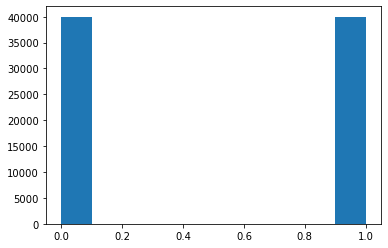

In [12]:
# In store vs online purchases
plt.hist(data['in-store'])
plt.show()

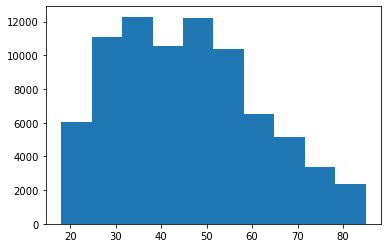

In [13]:
# Age distribution
plt.hist(data['age'])
plt.show()

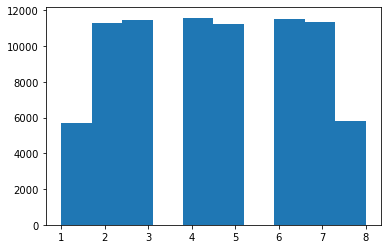

In [14]:
# Number of items per purchase
plt.hist(data['items'])
plt.show()

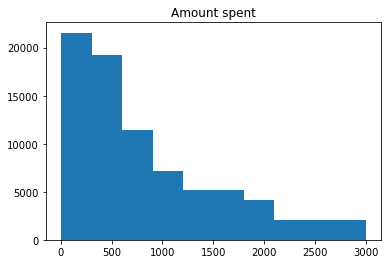

In [15]:
# Amount spent for all purchases
plt.hist(data['amount'])
plt.title("Amount spent")
plt.show()

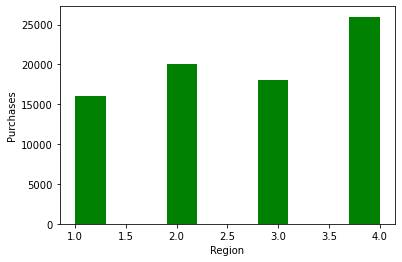

In [16]:
# Adding color and axis labels
plt.hist(data['region'], color = 'green')
plt.xlabel("Region")
plt.ylabel("Purchases")
plt.show()

In [17]:
# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

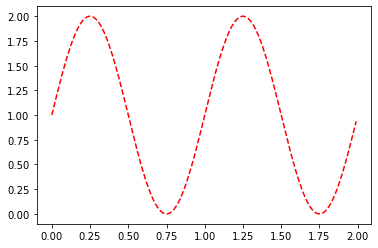

In [18]:
fig, ax = plt.subplots()
ax.plot(t, s, color ='red', linestyle = 'dashed')
plt.show()

In [19]:
data_sample = data.sample(100)

In [20]:
x = data_sample['age']
y = data_sample['amount']

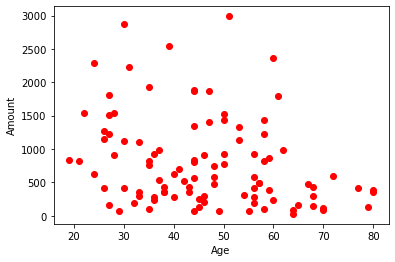

In [21]:
# Getting familiat with chart types and parameters for visualization
plt.scatter(x,y, marker='o', color ='red')
plt.xlabel("Age")
plt.ylabel("Amount")
plt.show()

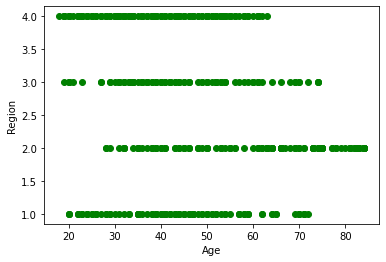

In [22]:
data_sample = data.sample(500)
x = data_sample['age']
y = data_sample['region']
plt.scatter(x,y, marker='o', color ='green')
plt.xlabel("Age")
plt.ylabel("Region")
plt.show()

In [23]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')


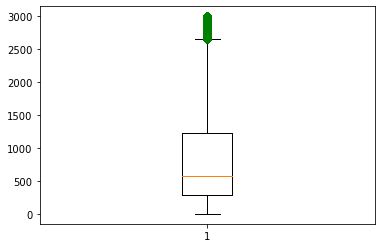

In [24]:
A = data['amount']
plt.boxplot(A,0,'gD')
plt.show()

In [25]:
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


In [26]:
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321


In [27]:
# EDA
#Data Mining: Region - Amount Spent per Transaction
# Per region
data.groupby('region')['region'].count()

region
1    15997
2    19994
3    18000
4    25988
Name: region, dtype: int64

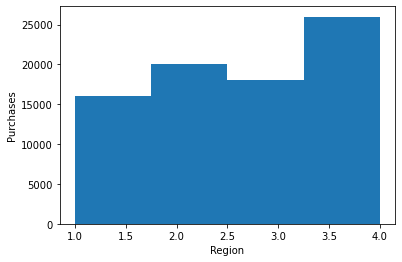

In [28]:
plt.hist(data['region'], bins=4)
plt.xlabel("Region")
plt.ylabel("Purchases")
plt.show()

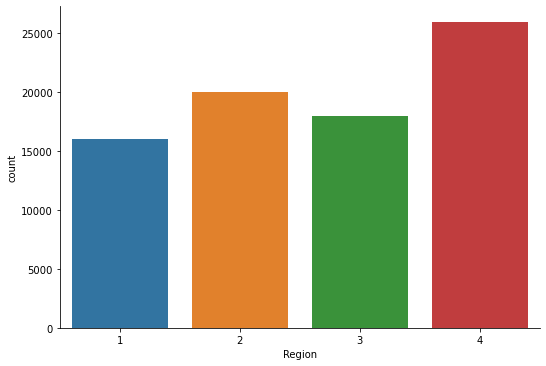

In [29]:
# Using seaborn
fg = sb.catplot(x='region', data=data, kind='count', aspect=1.5)
fg.set_xlabels('Region')

In [30]:
# Per Amount
data.groupby('amount')['amount'].count()

amount
5.0047       1
5.0604       1
5.0660       1
5.1175       1
5.1583       1
            ..
2999.4000    1
2999.6000    2
2999.7000    1
2999.8000    1
3000.0000    2
Name: amount, Length: 56112, dtype: int64

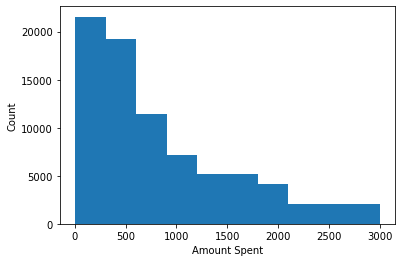

In [31]:
plt.hist(data['amount'])
plt.xlabel("Amount Spent")
plt.ylabel("Count")
plt.show()

In [32]:
# Amount Spent by Region
data.groupby(['amount', 'region'])['region'].count()

amount     region
5.0047     2         1
5.0604     2         1
5.0660     2         1
5.1175     2         1
5.1583     2         1
                    ..
2999.6000  4         2
2999.7000  4         1
2999.8000  3         1
3000.0000  3         1
           4         1
Name: region, Length: 68517, dtype: int64

In [33]:
# Another form of grouping the same data
data.groupby(['region', 'amount'])['amount'].count()

region  amount  
1       50.050      1
        50.294      1
        50.372      1
        50.547      1
        50.627      1
                   ..
4       2998.600    3
        2999.000    1
        2999.600    2
        2999.700    1
        3000.000    1
Name: amount, Length: 68517, dtype: int64

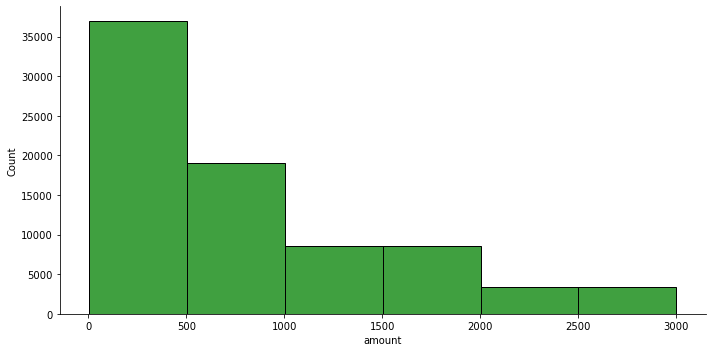

In [34]:
# Using seaborn to group by

figure = sb.displot(data['amount'], bins=6, aspect=2, kde=False, color='green')

Text(0.5, 0, 'Amount')

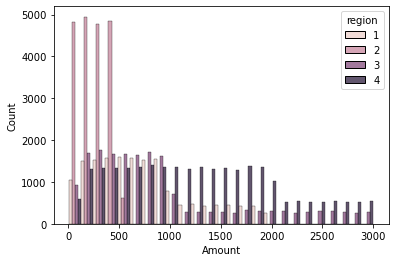

In [35]:
figure = sb.histplot(data=data, x='amount', hue='region', multiple="dodge", bins=25)
figure.set_xlabel('Amount')

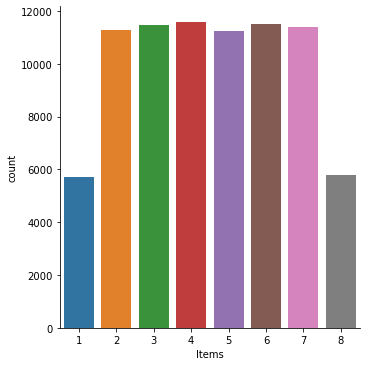

In [37]:
# Amount of Items per pruchase with Seaborn
fig = sb.catplot(x='items', data=data, kind='count')
fig.set_xlabels('Items')

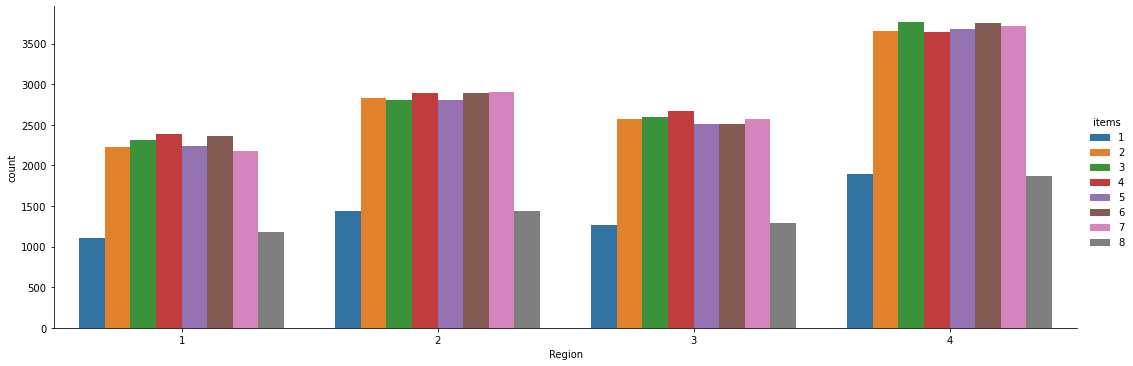

In [38]:
# Amount of Items per purchase in each region
figur = sb.catplot(x='region', data=data, hue='items', kind='count', aspect=3)
figur.set_xlabels('Region')

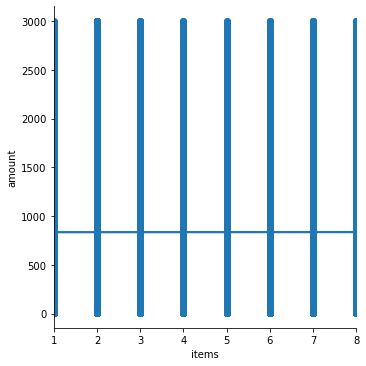

In [39]:
# Linear plot of items vs. amount spent
sb.lmplot(x='items', y='amount', data=data)

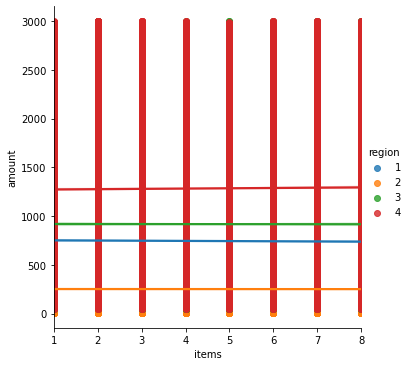

In [40]:
# Items vs. Amount Spent grouped by Region
sb.lmplot(x='items', y='amount', data=data, hue='region')

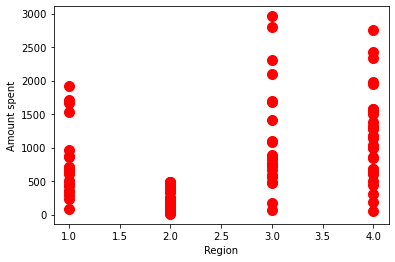

In [41]:
# Data sample to visualize amount spent pattern across regions
data_sample = data.sample(100)
x = data_sample['region']
y = data_sample['amount']
plt.xlabel("Region")
plt.ylabel("Amount spent");
plt.scatter(x,y, marker='o', color='r', s=2*50)
plt.show()

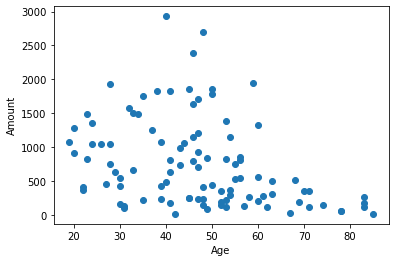

In [42]:
# Data sample to visualize amount spent pattern for all ages
data_sample = data.sample(100)
x = data_sample['age']
y = data_sample['amount']
plt.scatter(x,y, marker='o',)
plt.xlabel("Age")
plt.ylabel("Amount")
plt.show()

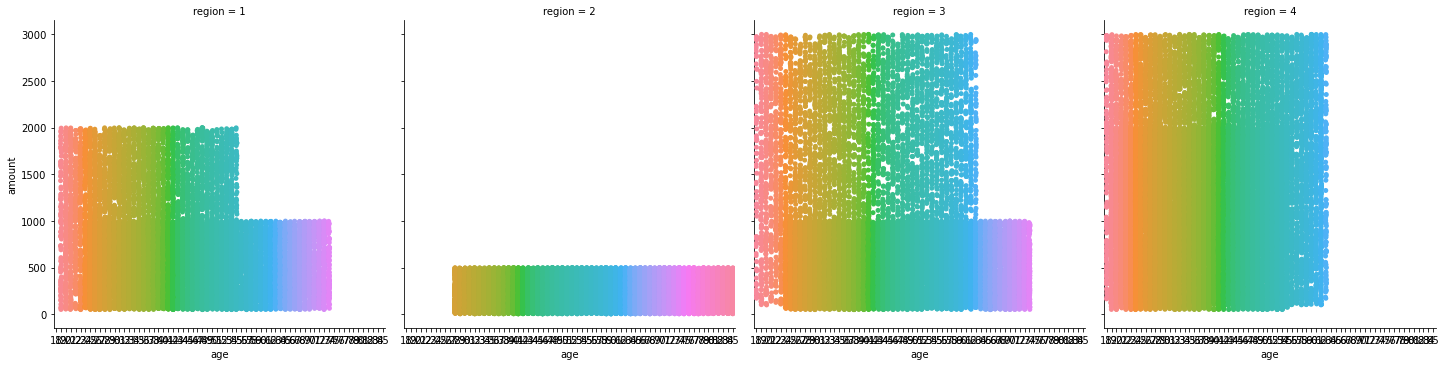

In [43]:
# Using a different type of chart to visualize data - getting familiar
sb.catplot(x='age', y='amount', data=data, col='region')

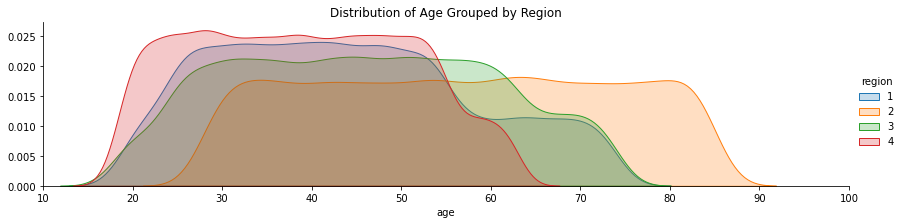

In [44]:
# Another distribution chart - getting familiar
fig = sb.FacetGrid(data, hue='region', aspect=4)
fig.map(sb.kdeplot, 'age', shade=True)
fig.set(xlim=(10,100))
fig.set(title='Distribution of Age Grouped by Region')
fig.add_legend()